In [15]:
import numpy as np
import matplotlib.pyplot as plt

%run "utils.ipynb"

In [30]:
# if __name__ == "__main__":
df = get_data()

houses = df["Hogwarts House"].unique()
columns = {column: [] for column in df.select_dtypes(include=['number']).columns}
colors = ['blue', 'green', 'red', 'purple']



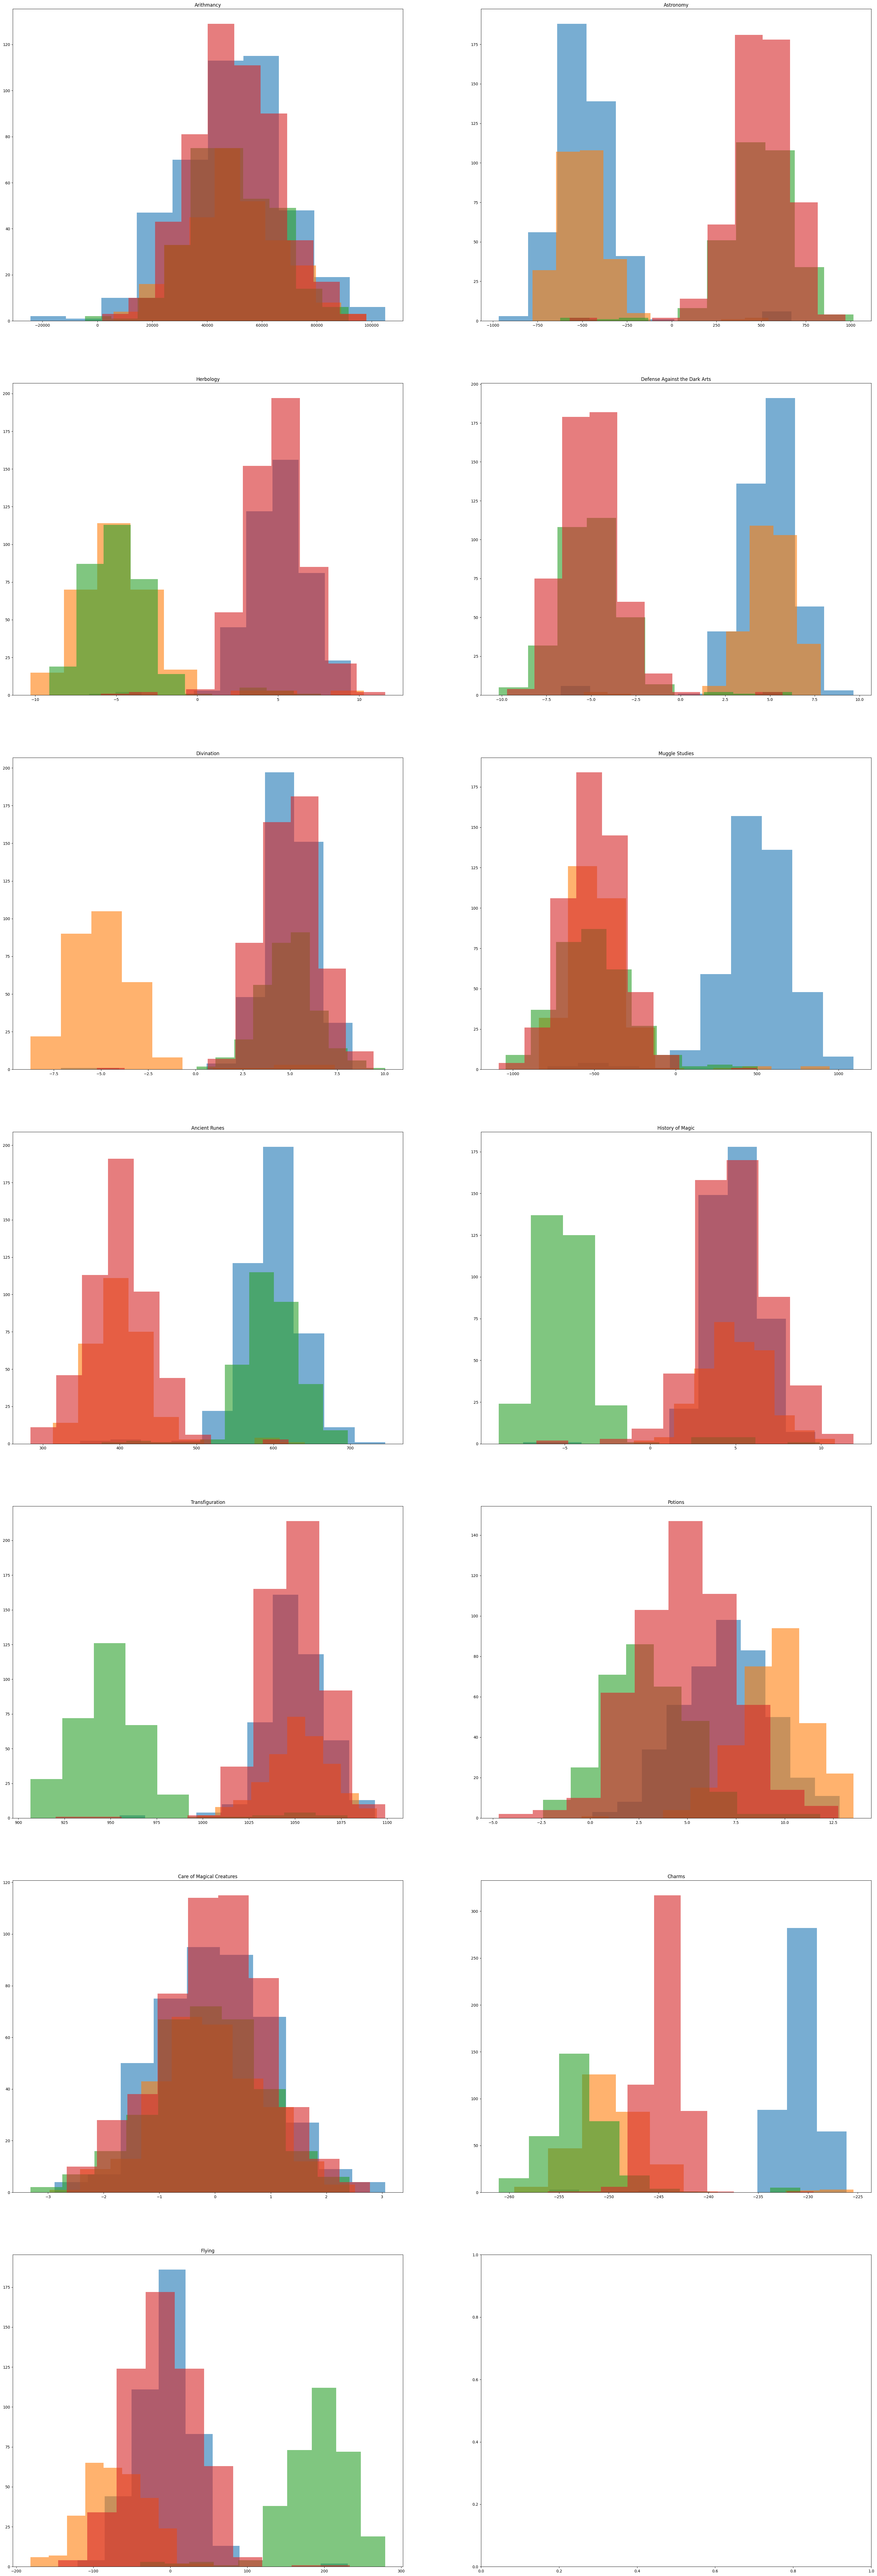

In [43]:
fig, axes = plt.subplots(7, 2, figsize = (40, 120))
axes = axes.flatten()

i = 0
for column in columns:
    j = 0
    for house in houses:
        house_data = df[df["Hogwarts House"] == house]
        axes[i].hist(house_data[column], bins = 10, alpha = 0.6)
        axes[i].set_label(house)
        axes[i].set_title(column)
        j += 1
    i += 1

plt.show()